In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
analysis = pd.read_csv("weatherHistory.csv")

In [3]:
#to display the top 5 rows

analysis.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
#to display the bottom 5 rows

analysis.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


In [5]:
analysis.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [6]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 96453 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
#Checking DataTypes of columns

analysis.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
#Checking for Null Values

analysis.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
#Formatting Date

analysis['Formatted Date'] = pd.to_datetime(analysis['Formatted Date'], utc=True)
analysis['Formatted Date']

0       2006-03-31 22:00:00
1       2006-03-31 23:00:00
2       2006-04-01 00:00:00
3       2006-04-01 01:00:00
4       2006-04-01 02:00:00
5       2006-04-01 03:00:00
6       2006-04-01 04:00:00
7       2006-04-01 05:00:00
8       2006-04-01 06:00:00
9       2006-04-01 07:00:00
10      2006-04-01 08:00:00
11      2006-04-01 09:00:00
12      2006-04-01 10:00:00
13      2006-04-01 11:00:00
14      2006-04-01 12:00:00
15      2006-04-01 13:00:00
16      2006-04-01 14:00:00
17      2006-04-01 15:00:00
18      2006-04-01 16:00:00
19      2006-04-01 17:00:00
20      2006-04-01 18:00:00
21      2006-04-01 19:00:00
22      2006-04-01 20:00:00
23      2006-04-01 21:00:00
24      2006-04-09 22:00:00
25      2006-04-09 23:00:00
26      2006-04-10 00:00:00
27      2006-04-10 01:00:00
28      2006-04-10 02:00:00
29      2006-04-10 03:00:00
                ...        
96423   2016-09-08 16:00:00
96424   2016-09-08 17:00:00
96425   2016-09-08 18:00:00
96426   2016-09-08 19:00:00
96427   2016-09-08 2

In [10]:
#Set index as "Date

analysis = analysis.set_index('Formatted Date')
analysis.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
#after resampling

data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = analysis[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01,-4.050000,0.890000
2006-01-01,-4.173708,0.834610
2006-02-01,-2.990716,0.843467
2006-03-01,1.969780,0.778737
2006-04-01,12.098827,0.728625


In [12]:
analysis.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

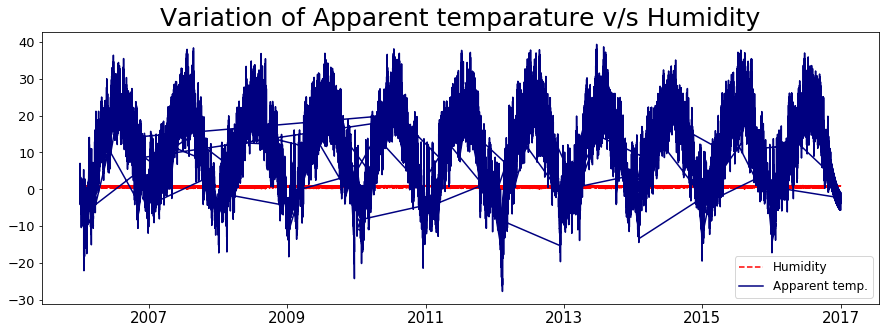

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5));
plt.plot(analysis['Humidity'], label = 'Humidity', color = 'red',linestyle='dashed');
plt.plot(analysis['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'navy');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13);

Text(0.5,1,'Humidity v/s Apparent Temperature')

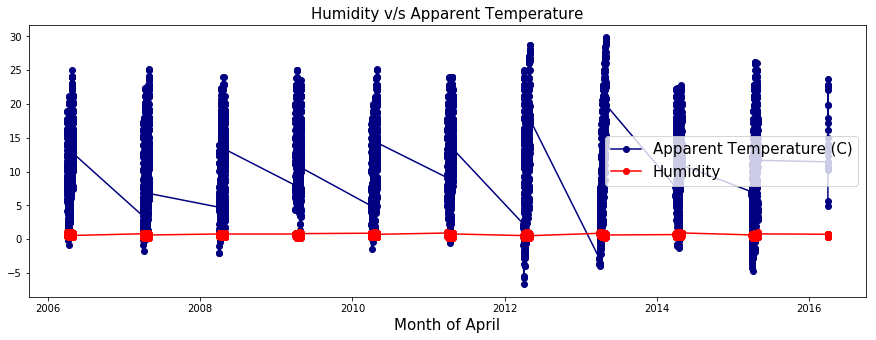

In [14]:
april = analysis[analysis.index.month==4]
plt.figure(figsize=(15,5))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'navy');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'red');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

In [15]:
analysis = analysis.reset_index()
analysis['Formatted Date'] = pd.to_datetime(analysis['Formatted Date'],utc = True)
analysis['month'] = analysis['Formatted Date'].dt.month
analysis['year'] = analysis['Formatted Date'].dt.year

In [16]:
data3 = analysis.groupby(['month','year']).mean()
data3.head()

Temperature (C)  Apparent Temperature (C)  Humidity  \
month year                                                        
1     2006        -1.677942                 -4.173708  0.834610   
      2007         4.873708                  2.387015  0.813495   
      2008         0.829996                 -2.069907  0.819476   
      2009        -1.166323                 -3.669937  0.867621   
      2010        -1.336320                 -4.329062  0.875914   

            Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
month year                                                               
1     2006           8.894211              161.018817         7.894064   
      2007          14.206324              225.302419        10.315599   
      2008          12.239246              175.850806         7.313360   
      2009           9.725049              161.725806         5.973381   
      2010          10.584668              168.479839         5.649542   

            Pressure (millibars)  
month year                        
1     2006           1021.204960  
      2007           1007.583589  
      2008           1021.189435  
      2009           1015.807944  
      2010           1015.038132

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text yticklabel objects>)

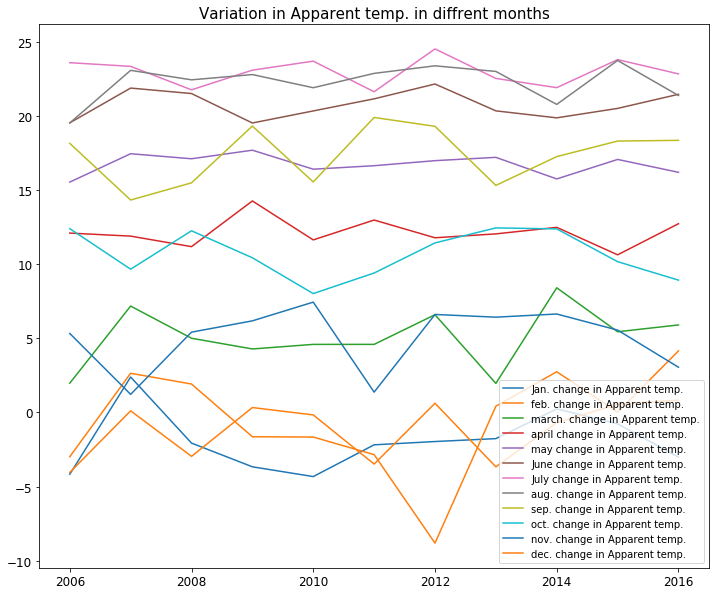

In [17]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Apparent Temperature (C)'][:11].values, label = 'Jan. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][11:22].values, label = 'feb. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][22:33].values, label = 'march. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][33:44].values, label = 'april change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][44:55].values, label = 'may change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][55:66].values, label = 'June change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][66:77].values, label = 'July change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][77:88].values, label = 'aug. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][88:99].values, label = 'sep. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][99:110].values, label = 'oct. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][110:121].values, label = 'nov. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][121:132].values, label = 'dec. change in Apparent temp.')
#plt.xlabel(np.arange(2006,2017), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Apparent temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7 Text yticklabel objects>)

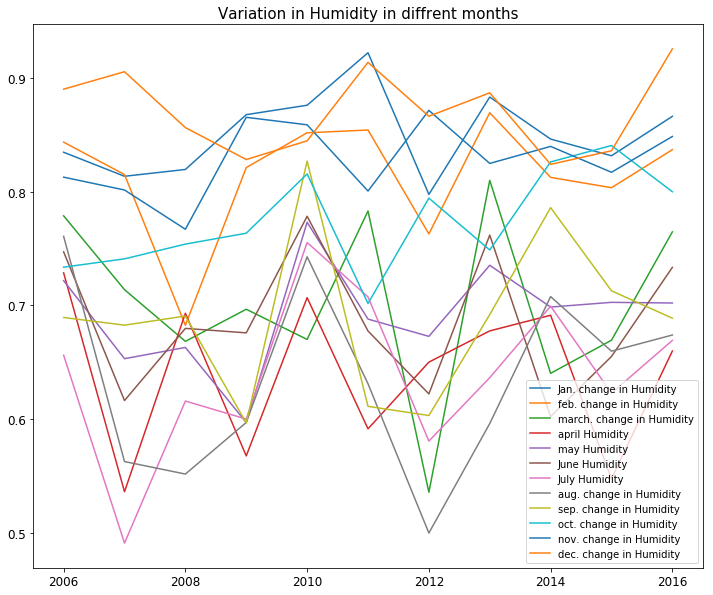

In [18]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][:11].values, label = 'Jan. change in Humidity')
plt.plot(a,data3['Humidity'][11:22].values, label = 'feb. change in Humidity')
plt.plot(a,data3['Humidity'][22:33].values, label = 'march. change in Humidity')
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity')
plt.plot(a,data3['Humidity'][44:55].values, label = 'may Humidity')
plt.plot(a,data3['Humidity'][55:66].values, label = 'June Humidity')
plt.plot(a,data3['Humidity'][66:77].values, label = 'July Humidity')
plt.plot(a,data3['Humidity'][77:88].values, label = 'aug. change in Humidity')
plt.plot(a,data3['Humidity'][88:99].values, label = 'sep. change in Humidity')
plt.plot(a,data3['Humidity'][99:110].values, label = 'oct. change in Humidity')
plt.plot(a,data3['Humidity'][110:121].values, label = 'nov. change in Humidity')
plt.plot(a,data3['Humidity'][121:132].values, label = 'dec. change in Humidity')
plt.legend(loc = 0)
plt.title('Variation in Humidity in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

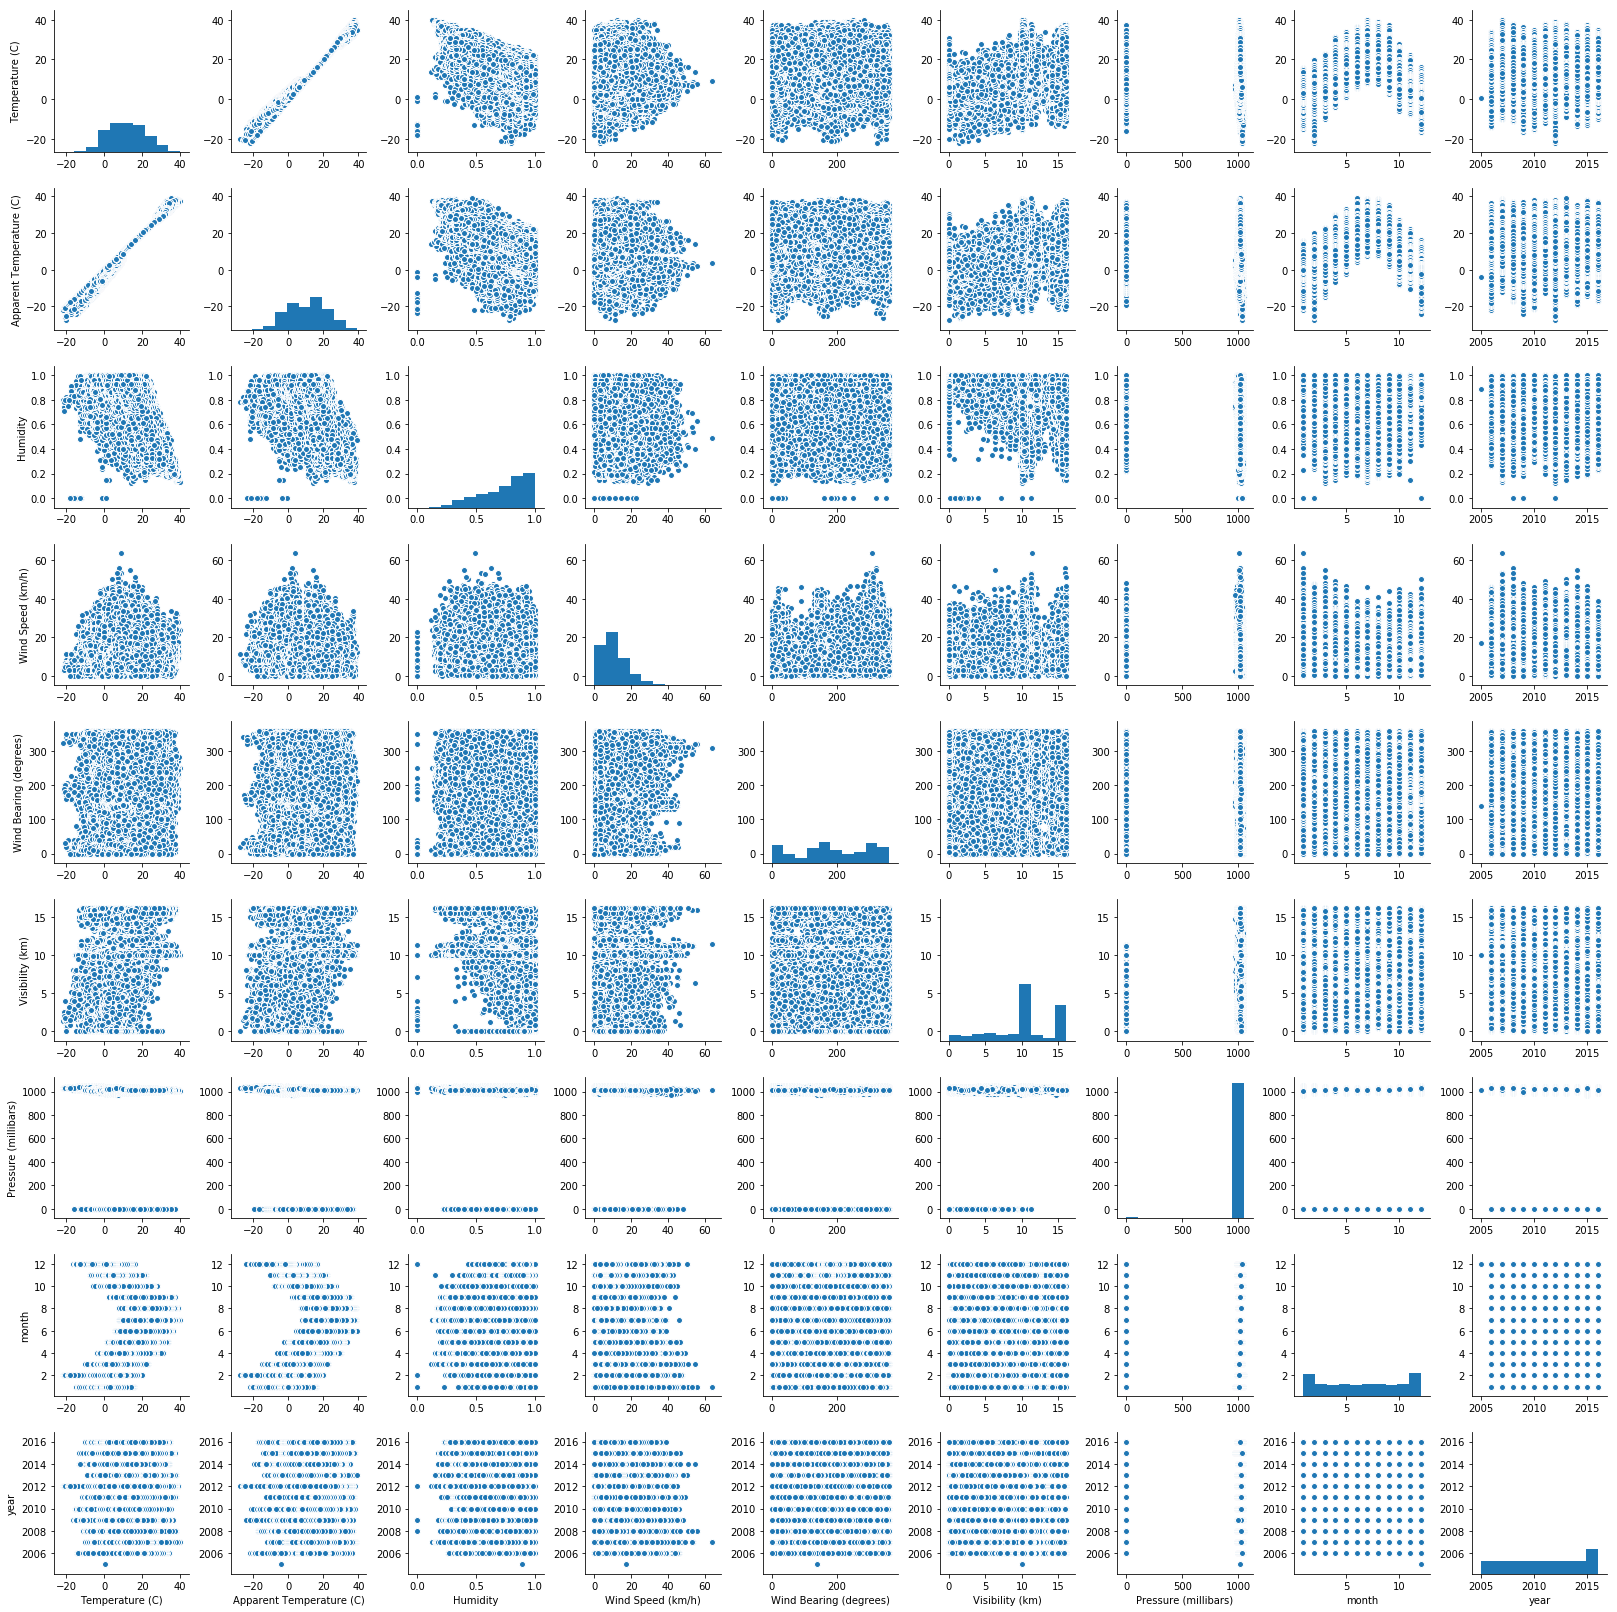

In [19]:
sns.pairplot(analysis)